In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import plotly.express as px
import seaborn as sns


In [3]:
data = pd.read_excel(r'C:\Users\godwi\Data_Science_ML\Exploratory_Analysis_Pandas\Olisama_sales\Olisamah.xlsx')

In [4]:
data.head()

,Salesman,Date,Particulars,product name,CATEGORY,CAT LV 1,Qty.,Price,Amount
0,BLESSING WISDOM,2023-01-02,Akinlotan Olayinka,HP 15 Dw1212nia (258K3EA),COMPUTING,HP NEW - CONSUMER,1,155000.0,155000.0
1,AROMIRE,2023-01-02,David Onwuakagba,WD 500GB ELEMENTS HARD DRIVE 3.0,COMPUTING,COMPUTING ACCESSORIES,1,19500.0,19500.0
2,ADEOLA ALABI,2023-01-03,TECH ON WEB LTD,HP 15 Dw1212nia (258K3EA),COMPUTING,HP NEW - CONSUMER,1,148000.0,148000.0
3,GIDEON ONONUGBOR,2023-01-03,Charleezy,HP PAVILION 14-dv0147nia,COMPUTING,HP NEW - CONSUMER,4,455000.0,1820000.0
4,PAMELA MBANUGO,2023-01-03,MRS YEMI ADEKUNLE,HP LASERJET M236DW PRINTER,COMPUTING,COMPUTING ACCESSORIES,1,118500.0,118500.0


In [5]:
data.shape

(8081, 9)

In [15]:
data.dtypes

Salesman                object
Date            datetime64[ns]
Particulars             object
product name            object
CATEGORY                object
CAT LV 1                object
Qty.                     int64
Price                  float64
Amount                 float64
dtype: object

In [6]:
# Check duplicate values
data.duplicated().sum()

200

In [7]:
data[data.duplicated()]

,Salesman,Date,Particulars,product name,CATEGORY,CAT LV 1,Qty.,Price,Amount
162,OLATUNDE AKINGBOYE,2023-01-07,MERGE TECH IT,HP LASERJET MFP M236d PRINTER,COMPUTING,COMPUTING ACCESSORIES,1,115000.0,115000.0
186,BLESSING WISDOM,2023-01-09,Source Nolas Integrated Systems,HP 15 Dw1212nia (258K3EA),COMPUTING,HP NEW - CONSUMER,2,145000.0,290000.0
193,OLAITAN DOLAPO,2023-01-09,MARQUEEN COMPUTERS,HP 15 Dw1212nia (258K3EA),COMPUTING,HP NEW - CONSUMER,2,145000.0,290000.0
194,OLAITAN DOLAPO,2023-01-09,MARQUEEN COMPUTERS,HP 15 Dw1212nia (258K3EA),COMPUTING,HP NEW - CONSUMER,2,145000.0,290000.0
240,ECOMMERCE,2023-01-11,TORCHTECH SOLUTION LTD,HP 17-BY0005CY REF,COMPUTING,Recertified,2,159100.0,318200.0
...,...,...,...,...,...,...,...,...,...
7857,Olarenwaju Racheal,2023-11-24,IDEA KONSULT LTD,CANYON COOLING STAND FOR NOTEBOOK NS02,COMPUTING,COMPUTING ACCESSORIES,1,6100.0,6100.0
7865,COMPUTING TEAM,2023-11-25,ALOH HASSAN,HP 17-BY3053CL REF (1G136UAR),COMPUTING,Recertified,1,243000.0,243000.0
7950,OPEYEMI SHUKURAT,2023-11-29,MCHNLAND TECHNOLOGY,HP Laptop 15-dw1197nia (39A48EA),COMPUTING,HP NEW - CONSUMER,1,285000.0,285000.0
8035,Ogudu Retail Stores,2023-12-04,OBAYEMI SAMUEL,HP 963 Black Original Ink Cartridge,COMPUTING,COMPUTING ACCESSORIES,1,28500.0,28500.0


In [8]:
# Drop duplicate rows (can affect analysis/ bias)
data.drop_duplicates(keep='first', inplace=True)

In [9]:
# Check for null values
data.isnull().any().sum()

0

In [10]:
# How many salesman
data.Salesman.nunique()

91

In [11]:
sm_no = data.Salesman.unique()

In [12]:
sales_man =[]
for i in enumerate(sm_no):
    sales_man.append(i)
    print (i)
    

(0, 'BLESSING WISDOM')
(1, 'AROMIRE')
(2, 'ADEOLA ALABI')
(3, 'GIDEON ONONUGBOR')
(4, 'PAMELA MBANUGO')
(5, 'OPERATIONS')
(6, 'IZUCHUKWU UWANDU')
(7, 'OLAITAN DOLAPO')
(8, 'Ikhide Inyemifuokha')
(9, 'OLATUNDE AKINGBOYE')
(10, 'Festac')
(11, 'LEKKI')
(12, 'PHC RETAIL 2')
(13, 'ECOMMERCE')
(14, 'RETAIL CORPORATE')
(15, 'NKIRU UZOESHI')
(16, 'CATHERYN ADETUNJI')
(17, 'SERVICE CENTER')
(18, 'HQ First Floor')
(19, 'Surulere')
(20, 'Irumah Chukwuma')
(21, 'UJU AJUFO')
(22, 'CHIYENUM EJECHI')
(23, 'Port Harcourt Retail 1')
(24, 'TOSIN OMOFAYE')
(25, 'Retention')
(26, 'HQ Ground Floor')
(27, 'Ogudu Retail Stores')
(28, 'Ibadan 1 Retail')
(29, 'Abuja Retail')
(30, 'Abuja Retail 2')
(31, 'IT Business Services')
(32, 'Asaba Retail')
(33, 'Hannatu Dabo')
(34, 'CHIAMAKA ORAFUNAM')
(35, 'Ibadan 2 Retail')
(36, 'ESTHER PAUL UMOH')
(37, 'TIMOTHY GODWIN')
(38, 'EDMUND OLA')
(39, 'FAYEMI AYOBAMI')
(40, 'Isaiah Timothy')
(41, 'Ndubuisi Igbokwe')
(42, 'EZEKIEL ARIYO')
(43, 'Lakowe Retail')
(44, 'Banjo Moy

In [372]:
len(sales_man)

91

In [302]:
# sales man by sales figure
sm_data =data.loc[:,['Salesman','Price']].groupby('Salesman').sum().sort_values('Price', ascending=False)[:10]

In [373]:
fig=px.bar(sm_data,orientation='h')
fig.show()

In [55]:
data['Year'] = pd.DatetimeIndex(data['Date']).year
data['Month']= pd.DatetimeIndex(data['Date']).month
data['Month']

0        1
1        1
2        1
3        1
4        1
        ..
8076    12
8077    12
8078    12
8079    12
8080    12
Name: Month, Length: 7881, dtype: int32

In [57]:
data['year_sync'] = data['Date'].dt.to_period('M')

In [62]:
data['year_sync']

0       2023-01
1       2023-01
2       2023-01
3       2023-01
4       2023-01
         ...   
8076    2023-12
8077    2023-12
8078    2023-12
8079    2023-12
8080    2023-12
Name: year_sync, Length: 7881, dtype: period[M]

In [67]:
data.to_csv('sales_data_analysis.csv')

In [66]:
# Sales by month/ year
data.loc[:,['year_sync','Salesman','Price']].pivot_table(index=['year_sync','Salesman'],values='Price',aggfunc='sum',margins=True,margins_name='Total')

Price
year_sync Salesman                    
2023-01   ADEOLA ALABI    4.810700e+06
          AROMIRE         4.983000e+05
          Abuja Retail    1.228200e+06
          Abuja Retail 2  1.347000e+05
          Asaba Retail    8.157000e+05
...                                ...
2023-12   SERVICE CENTER  2.250000e+05
          SHARON EGBUNU   1.300000e+05
          TOSIN OMOFAYE   4.150000e+05
          UJU AJUFO       2.850000e+05
Total                     1.816306e+09

[523 rows x 1 columns]

In [74]:
yr_2023 = pd.read_excel(r'C:\Users\godwi\Data_Science_ML\Exploratory_Analysis_Pandas\Olisama_sales\product_details.xlsx','2023 SELLOUT')
yr_2022 = pd.read_excel(r'C:\Users\godwi\Data_Science_ML\Exploratory_Analysis_Pandas\Olisama_sales\product_details.xlsx','2022 SELLOUT')
yr_2021 = pd.read_excel(r'C:\Users\godwi\Data_Science_ML\Exploratory_Analysis_Pandas\Olisama_sales\product_details.xlsx','2021 SELLOUT')

In [78]:
# add year to each df
yr_2021['year']= 2021
yr_2022['year']= 2022
yr_2023['year']= 2023

In [80]:
df_merged = pd.concat([yr_2021,yr_2022,yr_2023])

In [83]:
df_merged.rename({'year':'Year'},axis =1,inplace=True)

In [84]:
df_merged

,Item Details,BRAND,Category,Product Number,Cat LV1,Cat LV2,Cat LV3,Processor,Unit,Nett Sale Qty.,Nett Sale Amt.,Avg. Price,Year
0,128gb Ssd,ACCESSORIES,ACCESSORIES,Ssd,Computer Accessories,Accessories & spare parts,Other spare parts,ACCESSORIES,Pcs.,1,10000.0,10000.00,2021
1,128GB SSD 2.5 SATA,General,COMPUTING,,COMPUTING ACCESSORIES,Data Storage,Other spare parts,ACCESSORIES,Pcs.,1,8000.0,8000.00,2021
2,12V-2A CHARGER,General,MOBILE DEVICES & ACCESSORIES,,Accessories,Chargers & Cables,Chargers,not applicable,Pcs.,1,0.0,0.00,2021
3,14.0 PAPER SCREEN,SPARE PART,SPARE PART,A000006,SPARE PART,SPARE PART,SPARE PART,not applicable,Pcs.,2,50000.0,25000.00,2021
4,"15.6"" LCD SCREEN",General,SPARE PART,,SPARE PART,SPARE PART,SPARE PART,not applicable,Pcs.,9,292000.0,32444.44,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2477,HP Pavilion 14-dv0200nia(480W8EA),HP,COMPUTING,196068236762,HP NEW - CONSUMER,Laptop,Commercial,CORE I3,Pcs.,-1,-315000.0,315000.00,2023
2478,HP Envy X360 13-bd0063dx (4J6J9UA),HP,COMPUTING,,HP NEW - CONSUMER,Consumer,Laptop,CORE I5,Pcs.,-1,-427000.0,427000.00,2023
2479,LENOVO GAMING L340-15IRH 8/2TB,LENOVO,COMPUTING,194552130770,NONE HP,Gaming Laptop,non channel,CORE I7,Pcs.,-1,-475690.0,475690.00,2023
2480,LENOVO THINKPAD T590 I5/8GB/256GB,LENOVO,COMPUTING,193268990388,NONE HP,Laptop,Commercial,CORE I5,Pcs.,-1,-491000.0,491000.00,2023


In [88]:
df_merged.duplicated().sum()

0

In [282]:
year_sales  = df_merged.iloc[:,[12,10]].groupby('Year').sum()
year_sales

,Nett Sale Amt.
Year,
2021,6.015162e+09
2022,6.581654e+09
2023,6.721219e+09


In [293]:
df_merged[df_merged['Year'] == 2021].loc[:,['Nett Sale Amt.']].sum()

Nett Sale Amt.    6.015162e+09
dtype: float64

C:\Users\godwi\AppData\Local\Temp\ipykernel_21180\1536222936.py:3: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



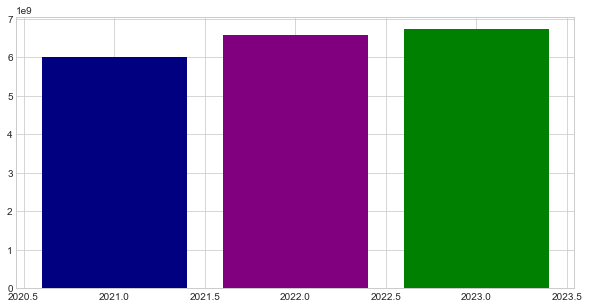

In [281]:
fig,ax=plt.subplots(figsize = (10,5))
plt.bar(year_sales.index, year_sales['Nett Sale Amt.'],color =['navy','purple','green'])
fig.show()

In [296]:
fig = px.bar(year_sales, text_auto=True)
fig.update_traces()
fig.show()

In [231]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

C:\Users\godwi\AppData\Local\Temp\ipykernel_21180\2840191903.py:4: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



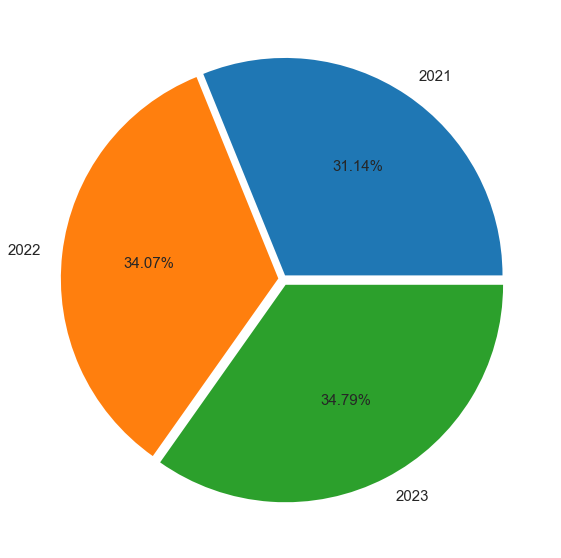

In [240]:

plt.style.use('seaborn-whitegrid')
fig, ax= plt.subplots(figsize= (10,10))
plt.pie(year_sales['Nett Sale Amt.'],labels=year_sales.index,autopct='%0.2f%%',explode =[0.02,0.02,0.03],textprops={'fontsize': 15})
fig.show()

In [107]:
df_merged.iloc[:,[4,10]].groupby('Cat LV1').sum().sort_values('Cat LV1')

,Nett Sale Amt.
Cat LV1,
,1.612909e+07
ACCESSORIES (PHONES & TABLETS,1.088665e+07
AIR CONDITIONERS,6.591298e+07
Accessories,1.497476e+08
Accessories & spare parts,8.000000e+02
...,...
TABLETS,3.164513e+08
TELEVISION & VIDEO,1.375814e+08
TV & Video,2.450000e+05


In [106]:
df_merged.iloc[:,[2,10]].groupby('Category').sum().sort_values('Category')

,Nett Sale Amt.
Category,
,1.165208e+07
ACCESSORIES,1.120079e+08
COMPUTING,1.149812e+10
CONSUMER ELECTRONICS,8.634168e+08
"HOME, OFFICE & FURNITURE",1.648084e+06
HP NEW - COMMERCIAL,5.507529e+08
HP NEW - CONSUMER,3.341584e+09
HP NEW CHANNEL,6.289000e+06
HP NEW NON CHANNEL,1.314000e+07


In [151]:
df_merged.iloc[:,[12,10,1]].pivot_table(index=['Year','BRAND'],values='Nett Sale Amt.',aggfunc='sum')

Nett Sale Amt.
Year BRAND                      
2021                  2516100.00
     ACCESSORIES     54855307.10
     ACER             6938788.35
     AMAZON          23073920.00
     APPLE           70909660.00
...                          ...
2023 Zkteco           3101378.00
     Zsmart            185700.00
     Zt800G-2           18000.00
     kingson           108400.00
     krusell            17700.00

[585 rows x 1 columns]

In [319]:
cat_1 = df_merged[df_merged['Year'] == 2021].loc[:,['Category','Nett Sale Amt.']].groupby('Category').sum()
cat_2 = df_merged[df_merged['Year'] == 2022].loc[:,['Category','Nett Sale Amt.']].groupby('Category').sum()
cat_3 = df_merged[df_merged['Year'] == 2023].loc[:,['Category','Nett Sale Amt.']].groupby('Category').sum()

In [332]:
cat_year = pd.merge(cat_1,cat_2, left_index=True, right_index=True, how='outer').merge(cat_3, left_index=True, right_index=True, how='outer').rename\
    ({'Nett Sale Amt._x': 'sales amt_2021'},axis=1).rename({'Nett Sale Amt._y': 'sales amt_2022'},axis=1).rename({'Nett Sale Amt.': 'sales amt_2023'},axis=1)

In [347]:
cat_year.to_excel('cat_yr.xlsx')

In [351]:
fig=px.bar(cat_year,barmode='group')
fig.update_layout(width = 1000)
fig.show()

In [370]:
df_merged.to_csv('merge.csv')

In [354]:
brand_1 = df_merged[df_merged['Year'] == 2021].loc[:,['BRAND','Nett Sale Amt.']].groupby('BRAND').sum()
brand_2 = df_merged[df_merged['Year'] == 2022].loc[:,['BRAND','Nett Sale Amt.']].groupby('BRAND').sum()
brand_3= df_merged[df_merged['Year'] == 2023].loc[:,['BRAND','Nett Sale Amt.']].groupby('BRAND').sum()

In [356]:
brand_year = pd.merge(brand_1,brand_2, left_index=True, right_index=True, how='outer').merge(brand_3, left_index=True, right_index=True, how='outer').rename\
    ({'Nett Sale Amt._x': 'brand_2021'},axis=1).rename({'Nett Sale Amt._y': 'brand_2022'},axis=1).rename({'Nett Sale Amt.': 'brand_2023'},axis=1)

In [357]:
brand_year

,brand_2021,brand_2022,brand_2023
BRAND,,,
2021,2021.00,NaN,NaN
,2516100.00,169000.00,NaN
12V,NaN,NaN,438900.00
ACCESSORIES,54855307.10,38541494.48,3473851.68
ACER,6938788.35,9561500.00,62000.00
...,...,...,...
Zsmart,889045.00,407900.00,185700.00
Zt800G-2,91200.00,60300.00,18000.00
kingson,234000.00,280200.00,108400.00
